In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde

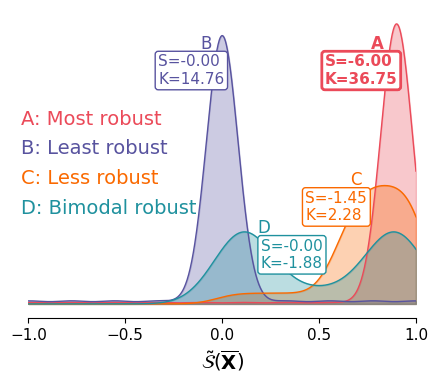

In [17]:
data1 = np.concatenate((np.linspace(-1, 1, 10), np.ones(200)*0.9))
data2 = np.concatenate((np.zeros(90), np.linspace(-1, 1, 10)))
data3 = np.concatenate((np.ones(20), np.linspace(0, 0.5, 10),
                        # np.ones(15)*0.5,
                        np.ones(10)*0.6, np.ones(20)*0.7,
                        np.ones(20)*0.8, np.ones(20)*0.9))
data4 = np.concatenate((np.ones(40)*0.1, 
                        np.ones(5)*0.2, np.ones(5)*0.4, np.ones(5)*0.6, np.ones(5)*0.8,
                        np.ones(40)*0.9))
skew1 = stats.skew(data1)
skew2 = stats.skew(data2)
skew3 = stats.skew(data3)
skew4 = stats.skew(data4)
kurt1 = stats.kurtosis(data1)
kurt2 = stats.kurtosis(data2)
kurt3 = stats.kurtosis(data3)
kurt4 = stats.kurtosis(data4)

fig, ax = plt.subplots(figsize=(5, 4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

x = np.linspace(-1, 1, 1000)
kde1 = gaussian_kde(data1)
ax.plot(x, kde1.pdf(x), color="#eb4a59", linewidth=1)
ax.fill_between(x, kde1.pdf(x), color="#eb4a59", alpha=.3)

kde2 = gaussian_kde(data2)
ax.plot(x, kde2.pdf(x), color="#58539f", linewidth=1)
ax.fill_between(x, kde2.pdf(x), color="#58539f", alpha=.3)

kde3 = gaussian_kde(data3)
ax.plot(x, kde3.pdf(x), color="#fa6900", linewidth=1)
ax.fill_between(x, kde3.pdf(x), color="#fa6900", alpha=.3)

kde4 = gaussian_kde(data4)
ax.plot(x, kde4.pdf(x), color="#1f919e", linewidth=1)
ax.fill_between(x, kde4.pdf(x), color="#1f919e", alpha=.3)


# sns.kdeplot(data1, fill=True, color='#D6594C', label='Negative Skewness, Higher Kurtosis', linewidth=0.5)
# sns.kdeplot(data2, fill=True, color='#364377', label='Possitive Skewness, Higher Kurtosis', alpha=.3, linewidth=0.5)
# sns.kdeplot(data3, fill=True, color='#FC8002', label='Negative Skewness, Lower Kurtosis', linewidth=.5)
# sns.kdeplot(data4, fill=True, color='#0F4C3A', label='Bimodal distribution', linewidth=0.5)
# sns.kdeplot(data1, fill=True, label='Negative Skewness, Higher Kurtosis', cut=0, alpha=.3, linewidth=0)
# sns.kdeplot(data2, fill=True, label='Possitive Skewness, Higher Kurtosis', cut=0, alpha=.3, linewidth=0)
# sns.kdeplot(data3, fill=True, label='Negative Skewness, Lower Kurtosis', cut=0, alpha=.3, linewidth=0)
# sns.kdeplot(data4, fill=True, label='Bimodal distribution', cut=0, alpha=.3, linewidth=0)
ax.text(0.77, 4.26, 'A', weight='bold', fontsize=12, color='#eb4a59')
ax.text(-0.11, 4.26, 'B', fontsize=12, color='#58539f')
ax.text(0.66, 1.99, 'C', fontsize=12, color='#fa6900')
ax.text(0.18, 1.19, 'D', fontsize=12, color='#1f919e')
ax.text(0.53, 3.68, 'S={:.2f}\nK={:.2f}'.format(skew1, kurt1), weight='bold', fontsize=11, color='#eb4a59', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#eb4a59", lw=2))
ax.text(-0.33, 3.68, 'S={:.2f}\nK={:.2f}'.format(skew2, kurt2), color='#58539f', fontsize=11, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#58539f", lw=1))
ax.text(0.43, 1.4, 'S={:.2f}\nK={:.2f}'.format(skew3, kurt3), fontsize=11, color='#fa6900', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#fa6900", lw=1))
ax.text(0.2, 0.6, 'S={:.2f}\nK={:.2f}'.format(skew4, kurt4), fontsize=11, color='#1f919e', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#1f919e", lw=1))

ax.text(-1.04, 3, 'A: Most robust', fontsize=14, color='#eb4a59')
ax.text(-1.04, 2.5, 'B: Least robust', fontsize=14, color='#58539f')
ax.text(-1.04, 2, 'C: Less robust', fontsize=14, color='#fa6900')
ax.text(-1.04, 1.5, 'D: Bimodal robust', fontsize=14, color='#1f919e')

plt.xticks([-1.0, -0.5, 0, 0.5, 1.0], fontsize=11)
plt.xlim(-1.0, 1.0)
plt.yticks([])
# plt.ylabel('Density')
# plt.xlabel('Normalized score drop')
plt.xlabel("$\\tilde{\\mathcal{S}}(\\overline{\\mathbf{X}})$", fontsize=14)
plt.savefig("dist_exp.pdf", bbox_inches='tight')